# EO 1 chan, 19 chan, 1 stft, 19 stft (2x2 plot) turkish

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [14]:
# load npy combined_stft_features_19_final.npy
dir = "E:/ChristianMusaeus/Data/Turkish/"
stft_data = np.load(f"{dir}combined_stft_features_19_final.npy")
print(stft_data.shape)
stft_data = stft_data[:,:-1]
normal_data = np.load(f"{dir}dataframe.npy")
print(f"normal_data.shape before: {normal_data.shape}")

# keep these channels only, these are the indexes: 
""" 
Fp1 -> 0
Fp2 -> 33
F3  -> 4
F4  -> 38
C3  -> 12
C4  -> 48
P3  -> 20
P4  -> 55
O1  -> 26
O2  -> 61
F7  -> 6
F8  -> 40
T7  -> 14
T8  -> 50
P7  -> 22
P8  -> 57
Fz  -> 36
Cz  -> 46
Pz  -> 30 

but add 1 to each index, since the first channel is channel_1
"""
df = pd.DataFrame(normal_data)
df = df[[0, 33, 4, 38, 12, 48, 20, 55, 26, 61, 6, 40, 14, 50, 22, 57, 36, 46, 30]]
turkish_raw = df 
print(turkish_raw.shape)


(2980, 6176)
normal_data.shape before: (762880, 65)
(762880, 19)


# Prepare raw data to be scaled and plotted

In [15]:
# Chop data up into 1 second windows, i.e 256 samples and 19 channels. Make dataframe from this where each row is a a second of data
# Prepare to create the DataFrame
rows = []

# Loop through the number of segments in X
num_segments = 2980
num_features = 19*256  # 19 channels * 256 samples
# Step 1: Pre-allocate the array for the final data
# Each row will have num_features features
flattened_data = np.zeros((num_segments, num_features))

# Step 2: Extract and flatten segments
for i in range(num_segments):
    if i % 100 == 0: 
        print(f"progress: {i}/{num_segments}")
    # Extract the current block of 256 data points across 19 channels
    segment_features = df.T.iloc[:, i * 256:(i * 256 + 256)].values
    
    # Flatten the block to 1D and place it in the corresponding row
    flattened_data[i, :] = segment_features.flatten()

# Step 3: Create the DataFrame using the flattened data
# Create the DataFrame directly from the pre-allocated NumPy array
data_raw = pd.DataFrame(flattened_data)


# Normalize the data per patient
patient_ids = np.repeat([1,2,3,4,5,6,7,8,9,10],298) 

# Normalize per patient (within training and test sets)
data_norm_raw = []
for patient_id in np.unique(patient_ids):
    patient_data = data_raw[patient_ids == patient_id]
    # scaler = StandardScaler()
    scaler = MinMaxScaler(feature_range=(-1,1))

    patient_data_scaled = scaler.fit_transform(patient_data)
    data_norm_raw.append(patient_data_scaled)

data_norm_raw = np.concatenate(data_norm_raw, axis=0)
data_norm_raw = pd.DataFrame(data_norm_raw)
print(data_norm_raw.shape)

progress: 0/2980
progress: 100/2980
progress: 200/2980
progress: 300/2980
progress: 400/2980
progress: 500/2980
progress: 600/2980
progress: 700/2980
progress: 800/2980
progress: 900/2980
progress: 1000/2980
progress: 1100/2980
progress: 1200/2980
progress: 1300/2980
progress: 1400/2980
progress: 1500/2980
progress: 1600/2980
progress: 1700/2980
progress: 1800/2980
progress: 1900/2980
progress: 2000/2980
progress: 2100/2980
progress: 2200/2980
progress: 2300/2980
progress: 2400/2980
progress: 2500/2980
progress: 2600/2980
progress: 2700/2980
progress: 2800/2980
progress: 2900/2980
(2980, 4864)


In [4]:
# Normalize the data
data = pd.DataFrame(stft_data)

patient_ids = np.repeat([1,2,3,4,5,6,7,8,9,10],298) 

# Normalize per patient (within training and test sets)
data_norm = []
for patient_id in np.unique(patient_ids):
    patient_data = data[patient_ids == patient_id]
    # scaler = StandardScaler()
    scaler = MinMaxScaler(feature_range=(-1,1))

    patient_data_scaled = scaler.fit_transform(patient_data)
    data_norm.append(patient_data_scaled)

data_norm_stft = np.concatenate(data_norm, axis=0)
data_norm_stft = pd.DataFrame(data_norm_stft)
print(data_norm_stft.shape)

(2980, 6175)


# Turkish plotting
# Eyes Open

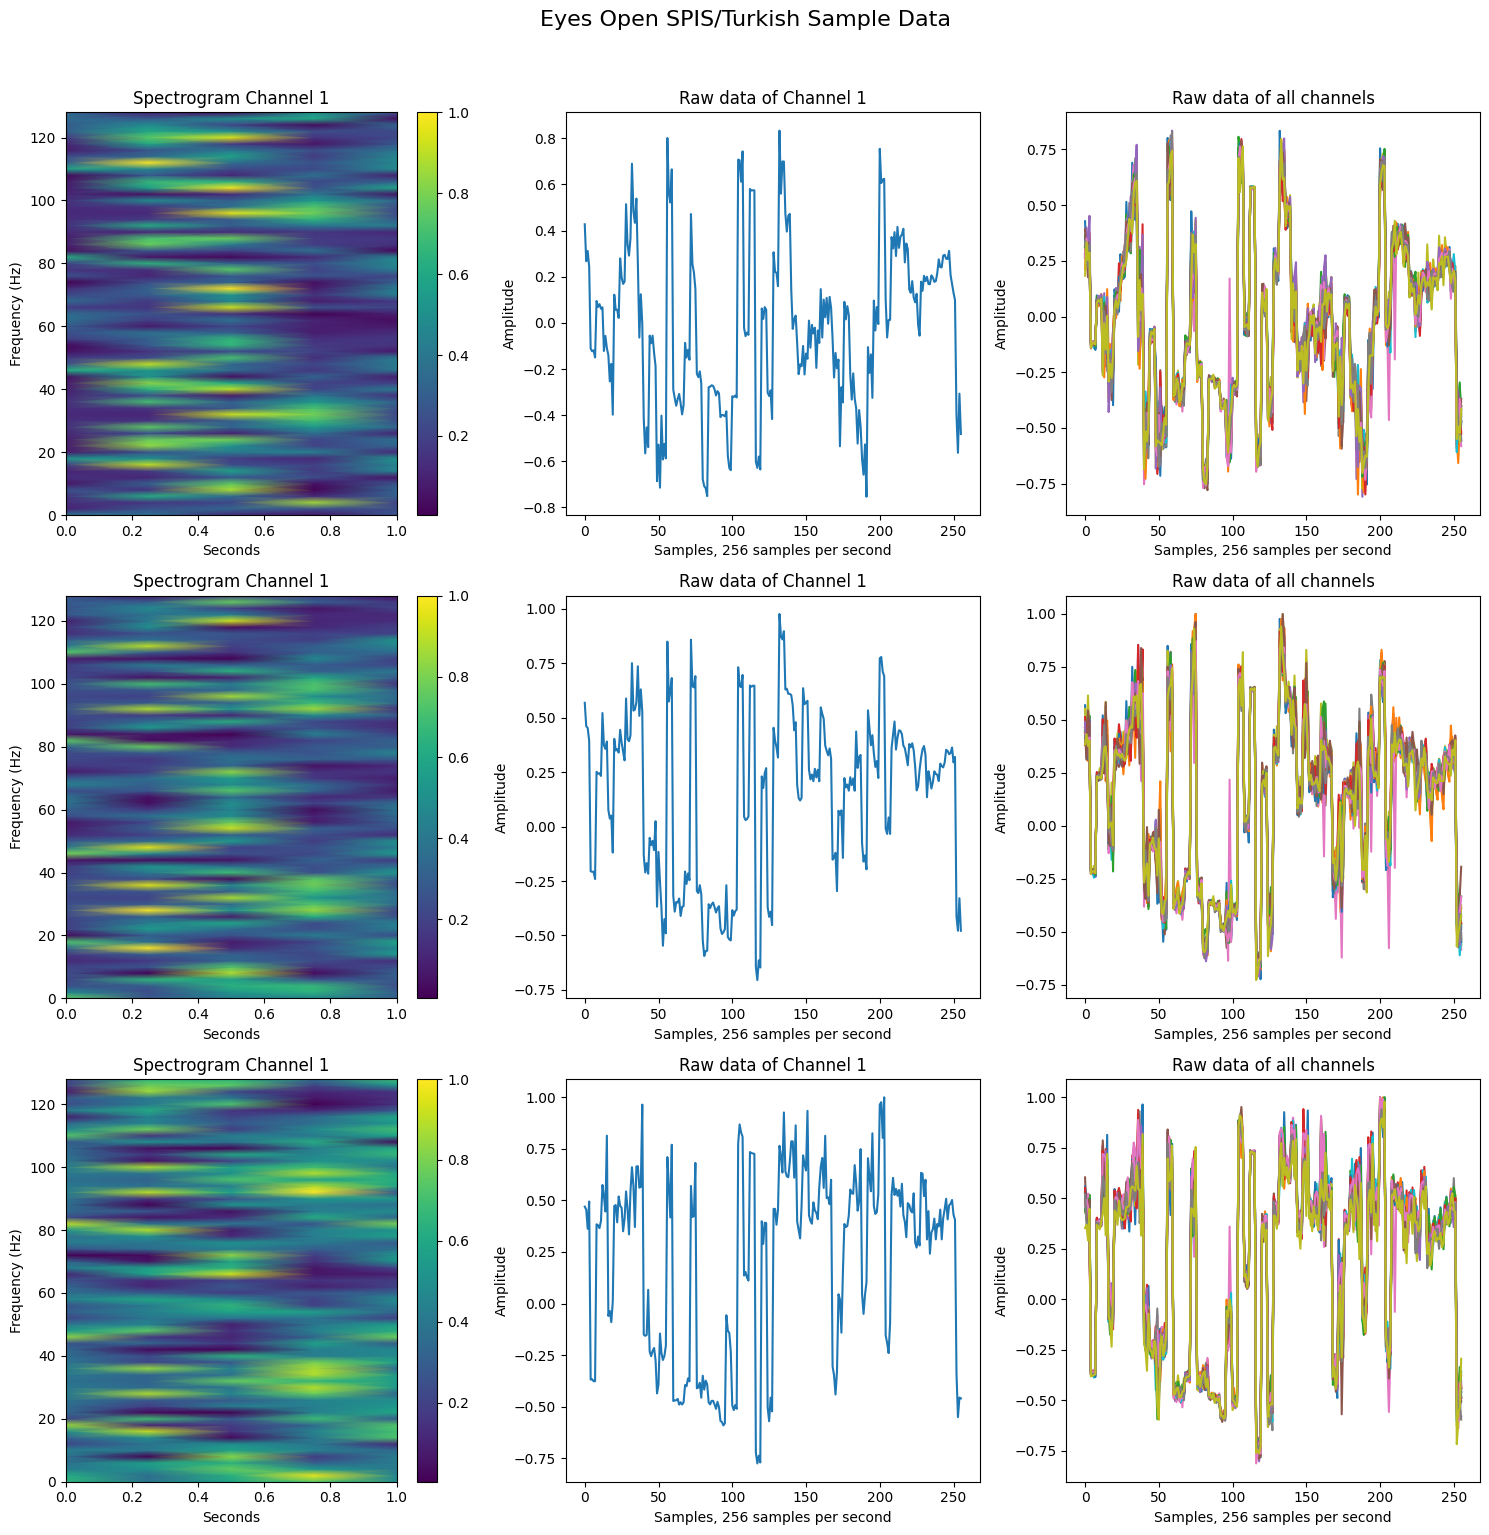

In [41]:
# make a 3x3 grid of subplots

second = 15

times = np.array([0,0.25,0.5,0.75,1])
frequencies = np.arange(0, 130, 2)
spectrogram0 = np.abs(data_norm_stft.iloc[second,:6175//19].values).reshape(len(frequencies), len(times))
spectrogram1 = np.abs(data_norm_stft.iloc[second+15,:6175//19].values).reshape(len(frequencies), len(times))
spectrogram2 = np.abs(data_norm_stft.iloc[second+35,:6175//19].values).reshape(len(frequencies), len(times))

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
im0 = axs[0, 0].pcolormesh(times, frequencies, spectrogram0, shading='gouraud')
axs[0, 0].set_ylabel('Frequency (Hz)')
axs[0, 0].set_xlabel('Seconds')
axs[0, 0].set_title('Spectrogram Channel 1')
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].pcolormesh(times, frequencies, spectrogram1, shading='gouraud')
axs[1, 0].set_ylabel('Frequency (Hz)')
axs[1, 0].set_xlabel('Seconds')
axs[1, 0].set_title('Spectrogram Channel 1')
fig.colorbar(im0, ax=axs[1, 0])

im2 = axs[2, 0].pcolormesh(times, frequencies, spectrogram2, shading='gouraud')
axs[2, 0].set_ylabel('Frequency (Hz)')
axs[2, 0].set_xlabel('Seconds')
axs[2, 0].set_title('Spectrogram Channel 1')
fig.colorbar(im0, ax=axs[2, 0])

axs[0, 1].plot(data_norm_raw.iloc[second,:].values.reshape(19,256)[0,:])
axs[0, 1].set_title('Raw data of Channel 1')
axs[0, 1].set_xlabel('Samples, 256 samples per second')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(data_norm_raw.iloc[second+15,:].values.reshape(19,256)[0,:])
axs[1, 1].set_title('Raw data of Channel 1')
axs[1, 1].set_xlabel('Samples, 256 samples per second')
axs[1, 1].set_ylabel('Amplitude')

axs[2, 1].plot(data_norm_raw.iloc[second+35,:].values.reshape(19,256)[0,:])
axs[2, 1].set_title('Raw data of Channel 1')
axs[2, 1].set_xlabel('Samples, 256 samples per second')
axs[2, 1].set_ylabel('Amplitude')


axs[0, 2].plot(data_norm_raw.iloc[second,:].values.reshape(19,256).T)
axs[0, 2].set_title('Raw data of all channels')
axs[0, 2].set_xlabel('Samples, 256 samples per second')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(data_norm_raw.iloc[second+15,:].values.reshape(19,256).T)
axs[1, 2].set_title('Raw data of all channels')
axs[1, 2].set_xlabel('Samples, 256 samples per second')
axs[1, 2].set_ylabel('Amplitude')

axs[2, 2].plot(data_norm_raw.iloc[second+35,:].values.reshape(19,256).T)
axs[2, 2].set_title('Raw data of all channels')
axs[2, 2].set_xlabel('Samples, 256 samples per second')
axs[2, 2].set_ylabel('Amplitude')



# Make overall title for row 0 
plt.suptitle('Eyes Open SPIS/Turkish Sample Data', y = 1.02, fontsize=16)
# tight layout
plt.tight_layout()
plt.show()

# Eyes Closed

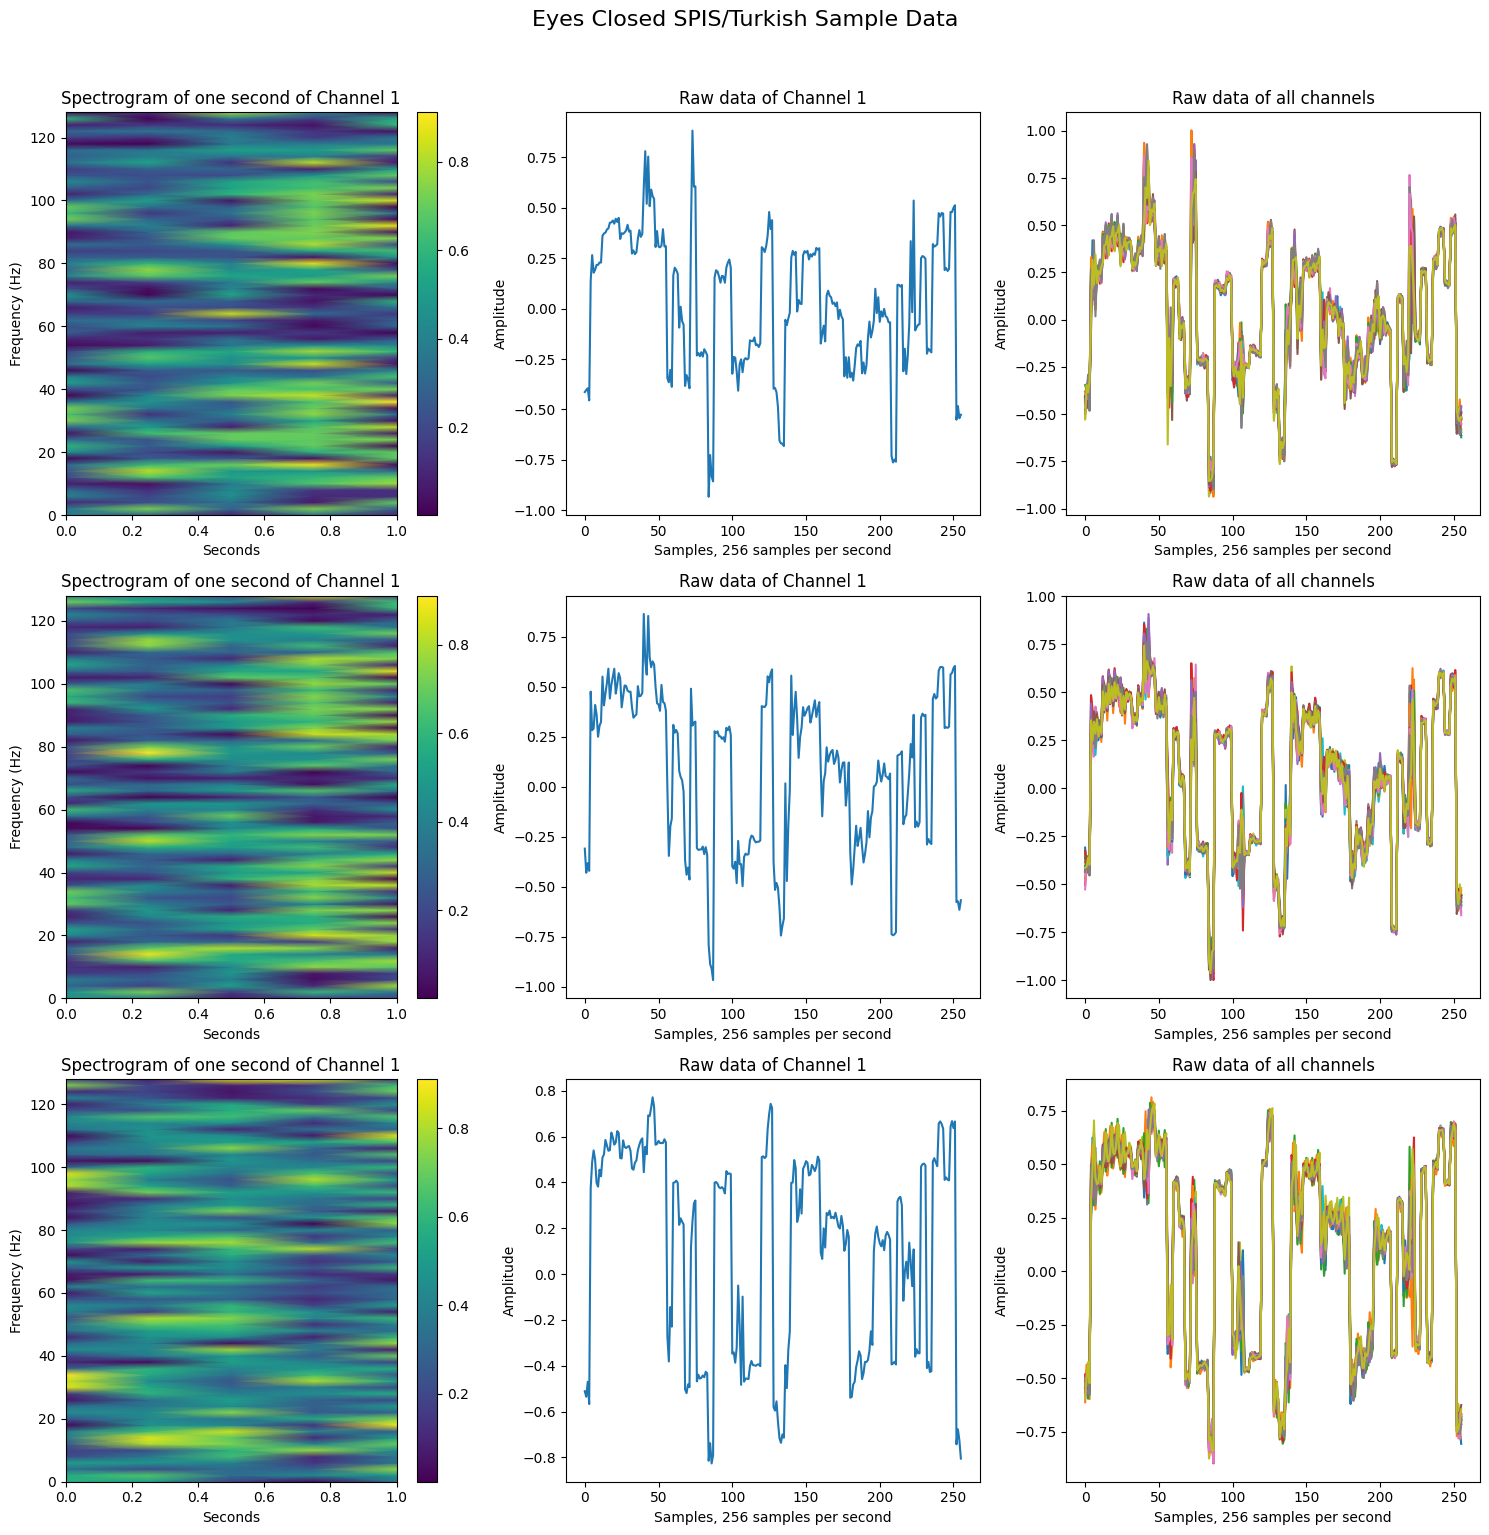

In [42]:
# make a 3x3 grid of subplots

second = 2400

times = np.array([0,0.25,0.5,0.75,1])
frequencies = np.arange(0, 130, 2)
spectrogram0 = np.abs(data_norm_stft.iloc[second,:6175//19].values).reshape(len(frequencies), len(times))
spectrogram1 = np.abs(data_norm_stft.iloc[second+15,:6175//19].values).reshape(len(frequencies), len(times))
spectrogram2 = np.abs(data_norm_stft.iloc[second+35,:6175//19].values).reshape(len(frequencies), len(times))

fig, axs = plt.subplots(3, 3, figsize=(15,15))
im0 = axs[0, 0].pcolormesh(times, frequencies, spectrogram0, shading='gouraud')
axs[0, 0].set_ylabel('Frequency (Hz)')
axs[0, 0].set_xlabel('Seconds')
axs[0, 0].set_title('Spectrogram of one second of Channel 1')
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].pcolormesh(times, frequencies, spectrogram1, shading='gouraud')
axs[1, 0].set_ylabel('Frequency (Hz)')
axs[1, 0].set_xlabel('Seconds')
axs[1, 0].set_title('Spectrogram of one second of Channel 1')
fig.colorbar(im0, ax=axs[1, 0])

im2 = axs[2, 0].pcolormesh(times, frequencies, spectrogram2, shading='gouraud')
axs[2, 0].set_ylabel('Frequency (Hz)')
axs[2, 0].set_xlabel('Seconds')
axs[2, 0].set_title('Spectrogram of one second of Channel 1')
fig.colorbar(im0, ax=axs[2, 0])

axs[0, 1].plot(data_norm_raw.iloc[second,:].values.reshape(19,256)[0,:])
axs[0, 1].set_title('Raw data of Channel 1')
axs[0, 1].set_xlabel('Samples, 256 samples per second')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(data_norm_raw.iloc[second+15,:].values.reshape(19,256)[0,:])
axs[1, 1].set_title('Raw data of Channel 1')
axs[1, 1].set_xlabel('Samples, 256 samples per second')
axs[1, 1].set_ylabel('Amplitude')

axs[2, 1].plot(data_norm_raw.iloc[second+35,:].values.reshape(19,256)[0,:])
axs[2, 1].set_title('Raw data of Channel 1')
axs[2, 1].set_xlabel('Samples, 256 samples per second')
axs[2, 1].set_ylabel('Amplitude')


axs[0, 2].plot(data_norm_raw.iloc[second,:].values.reshape(19,256).T)
axs[0, 2].set_title('Raw data of all channels')
axs[0, 2].set_xlabel('Samples, 256 samples per second')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(data_norm_raw.iloc[second+15,:].values.reshape(19,256).T)
axs[1, 2].set_title('Raw data of all channels')
axs[1, 2].set_xlabel('Samples, 256 samples per second')
axs[1, 2].set_ylabel('Amplitude')

axs[2, 2].plot(data_norm_raw.iloc[second+35,:].values.reshape(19,256).T)
axs[2, 2].set_title('Raw data of all channels')
axs[2, 2].set_xlabel('Samples, 256 samples per second')
axs[2, 2].set_ylabel('Amplitude')



# Make overall title for row 0 
plt.suptitle('Eyes Closed SPIS/Turkish Sample Data', y = 1.02, fontsize=16)
# tight layout
plt.tight_layout()
plt.show()

# Hospital plotting
## Eyes Closed

In [7]:
# Load in hospital data
dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked/"
hospital_data = pd.read_csv(f"{dir}df_EOandEC_norm.csv")
print(hospital_data.shape)
hospital_raw = hospital_data.iloc[:,:-2]

# Hospital spectrograms
hospital_spectrograms = pd.read_csv(f"{dir}hospital_spectrograms.csv")
print(hospital_spectrograms.shape)
hospital_spectrograms = hospital_spectrograms.iloc[:,:-2]

(3215, 3802)
(3215, 4847)


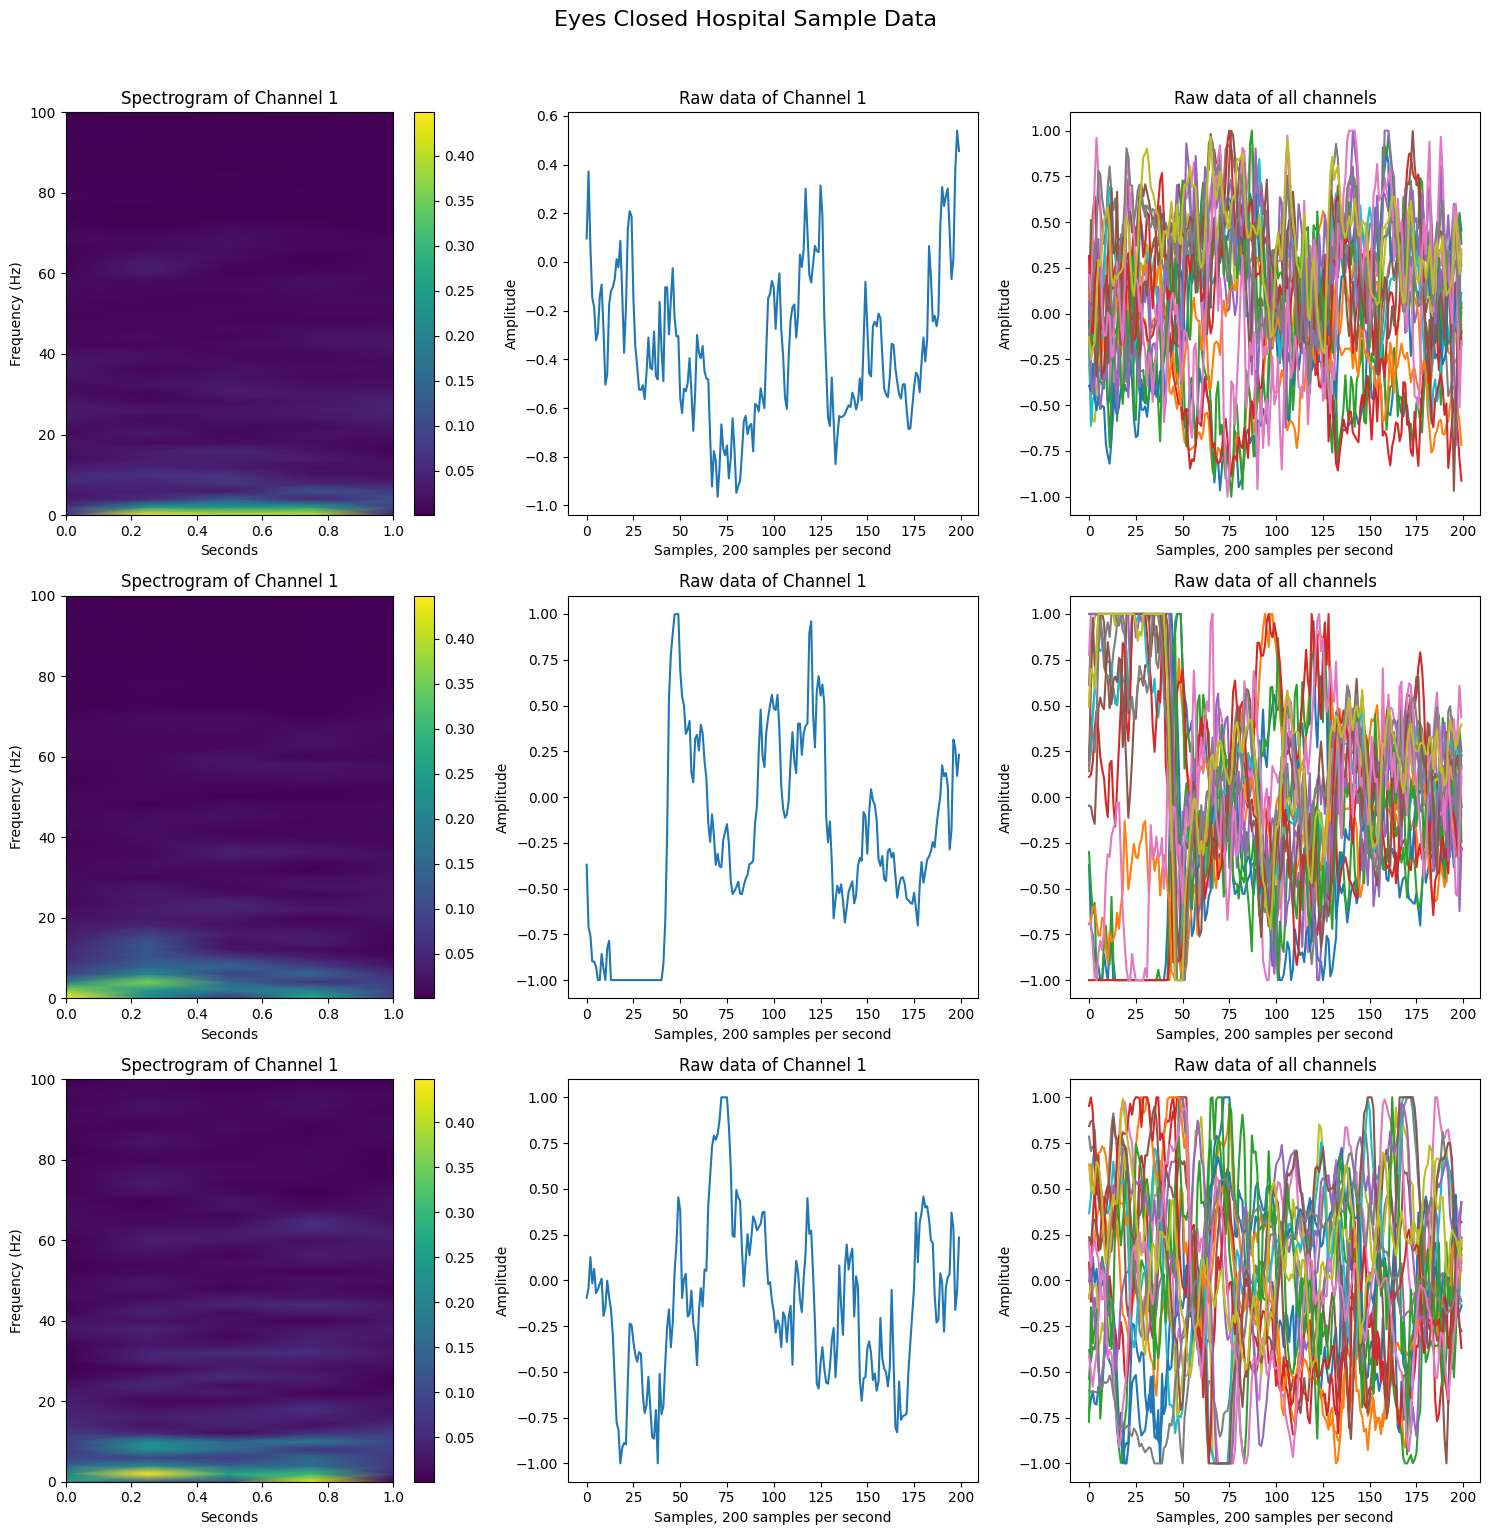

In [43]:
# make a 3x3 grid of subplots

second = 250

times = np.array([0,0.25,0.5,0.75,1])
frequencies = np.arange(0, 102, 2)
spectrogram0 = np.abs(hospital_spectrograms.iloc[second,:4845//19].values).reshape(len(frequencies), len(times))
spectrogram1 = np.abs(hospital_spectrograms.iloc[second+15,:4845//19].values).reshape(len(frequencies), len(times))
spectrogram2 = np.abs(hospital_spectrograms.iloc[second+35,:4845//19].values).reshape(len(frequencies), len(times))

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
im0 = axs[0, 0].pcolormesh(times, frequencies, spectrogram0, shading='gouraud')
axs[0, 0].set_ylabel('Frequency (Hz)')
axs[0, 0].set_xlabel('Seconds')
axs[0, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].pcolormesh(times, frequencies, spectrogram1, shading='gouraud')
axs[1, 0].set_ylabel('Frequency (Hz)')
axs[1, 0].set_xlabel('Seconds')
axs[1, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[1, 0])

im2 = axs[2, 0].pcolormesh(times, frequencies, spectrogram2, shading='gouraud')
axs[2, 0].set_ylabel('Frequency (Hz)')
axs[2, 0].set_xlabel('Seconds')
axs[2, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[2, 0])

axs[0, 1].plot(hospital_raw.iloc[second,:].values.reshape(19,200)[0,:])
axs[0, 1].set_title('Raw data of Channel 1')
axs[0, 1].set_xlabel('Samples, 200 samples per second')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(hospital_raw.iloc[second+15,:].values.reshape(19,200)[0,:])
axs[1, 1].set_title('Raw data of Channel 1')
axs[1, 1].set_xlabel('Samples, 200 samples per second')
axs[1, 1].set_ylabel('Amplitude')

axs[2, 1].plot(hospital_raw.iloc[second+35,:].values.reshape(19,200)[0,:])
axs[2, 1].set_title('Raw data of Channel 1')
axs[2, 1].set_xlabel('Samples, 200 samples per second')
axs[2, 1].set_ylabel('Amplitude')


axs[0, 2].plot(hospital_raw.iloc[second,:].values.reshape(19,200).T)
axs[0, 2].set_title('Raw data of all channels')
axs[0, 2].set_xlabel('Samples, 200 samples per second')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(hospital_raw.iloc[second+15,:].values.reshape(19,200).T)
axs[1, 2].set_title('Raw data of all channels')
axs[1, 2].set_xlabel('Samples, 200 samples per second')
axs[1, 2].set_ylabel('Amplitude')

axs[2, 2].plot(hospital_raw.iloc[second+35,:].values.reshape(19,200).T)
axs[2, 2].set_title('Raw data of all channels')
axs[2, 2].set_xlabel('Samples, 200 samples per second')
axs[2, 2].set_ylabel('Amplitude')



# Make overall title for row 0 
plt.suptitle('Eyes Closed Hospital Sample Data', y = 1.02, fontsize=16)
# tight layout
plt.tight_layout()
plt.show()

# Eyes Open


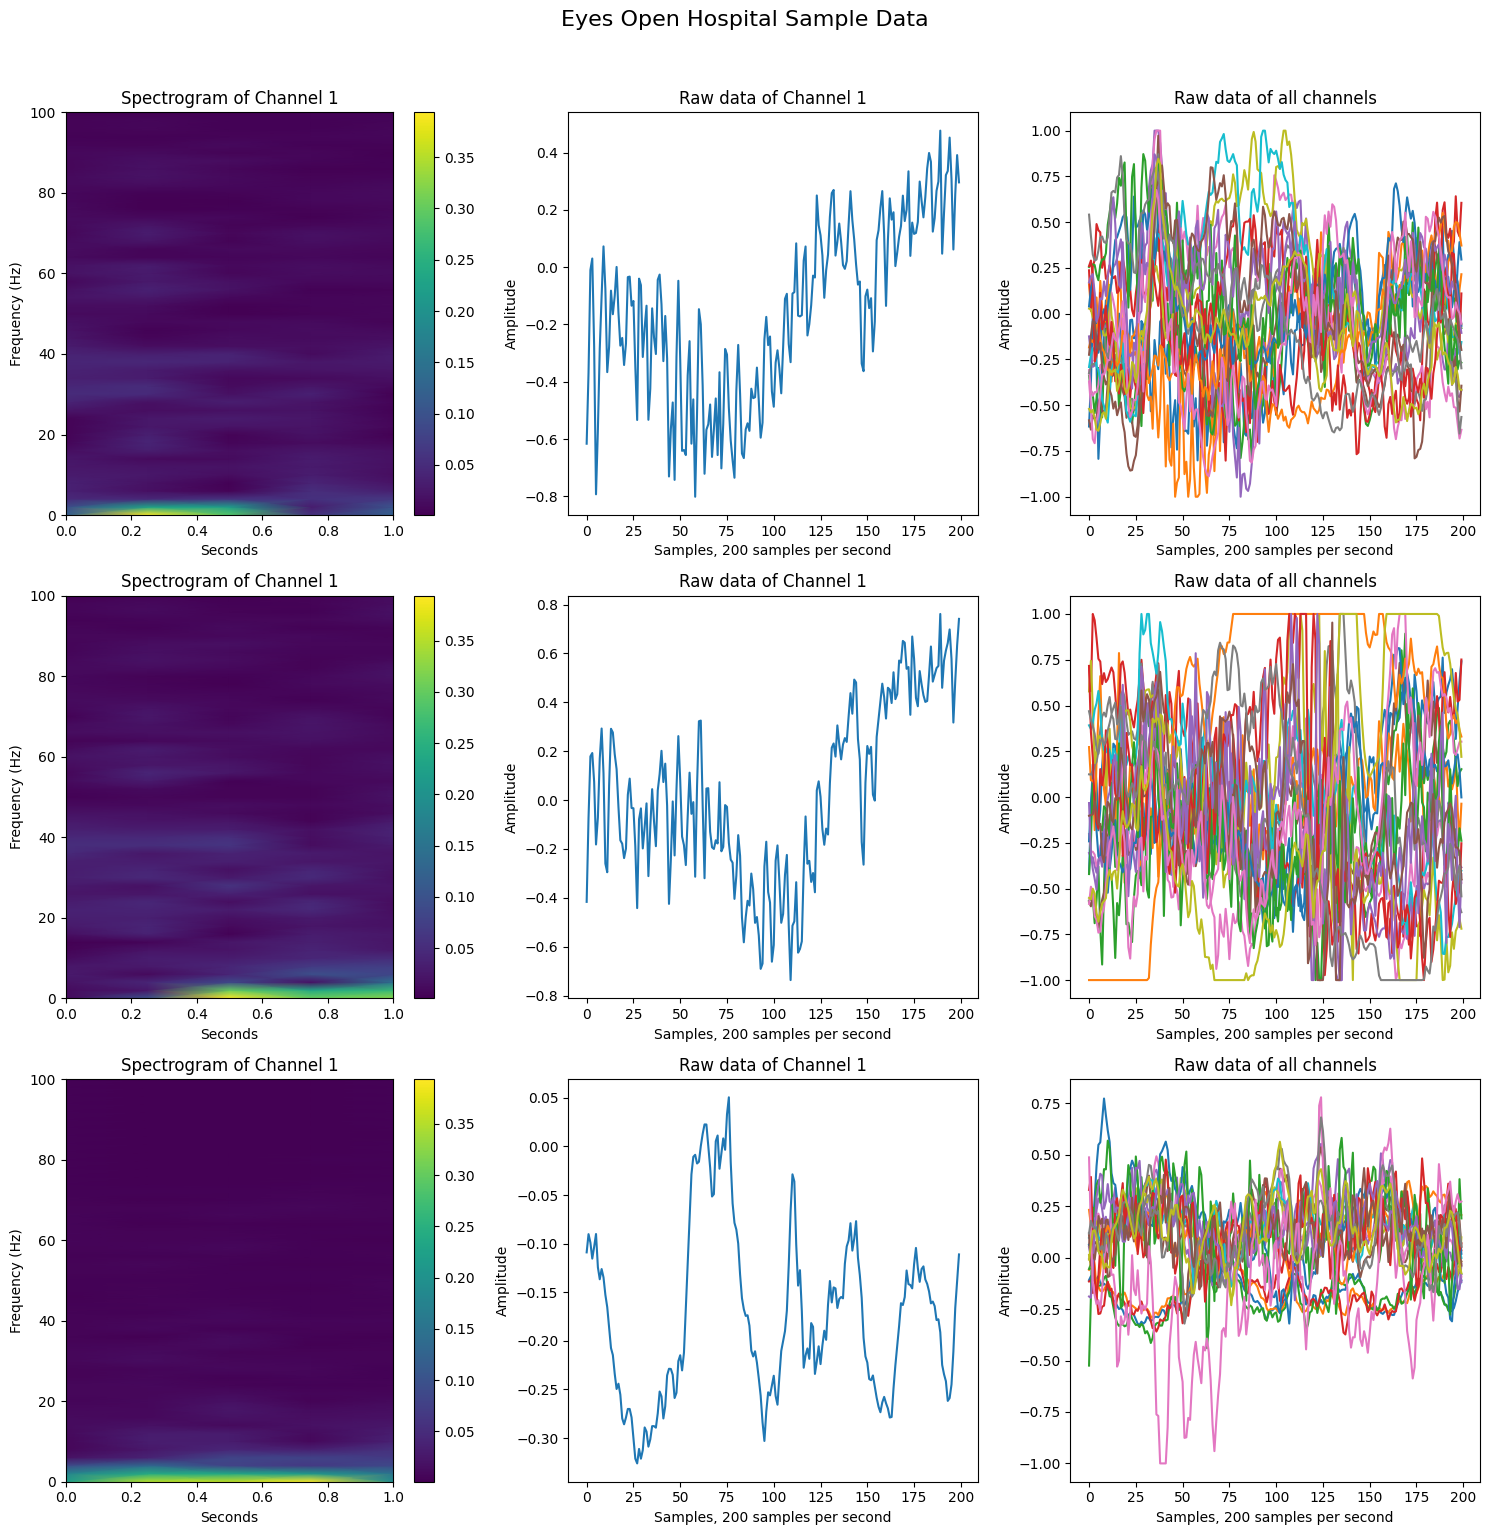

In [44]:
# make a 3x3 grid of subplots

second = 2000

times = np.array([0,0.25,0.5,0.75,1])
frequencies = np.arange(0, 102, 2)
spectrogram0 = np.abs(hospital_spectrograms.iloc[second,:4845//19].values).reshape(len(frequencies), len(times))
spectrogram1 = np.abs(hospital_spectrograms.iloc[second+15,:4845//19].values).reshape(len(frequencies), len(times))
spectrogram2 = np.abs(hospital_spectrograms.iloc[second+35,:4845//19].values).reshape(len(frequencies), len(times))

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
im0 = axs[0, 0].pcolormesh(times, frequencies, spectrogram0, shading='gouraud')
axs[0, 0].set_ylabel('Frequency (Hz)')
axs[0, 0].set_xlabel('Seconds')
axs[0, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].pcolormesh(times, frequencies, spectrogram1, shading='gouraud')
axs[1, 0].set_ylabel('Frequency (Hz)')
axs[1, 0].set_xlabel('Seconds')
axs[1, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[1, 0])

im2 = axs[2, 0].pcolormesh(times, frequencies, spectrogram2, shading='gouraud')
axs[2, 0].set_ylabel('Frequency (Hz)')
axs[2, 0].set_xlabel('Seconds')
axs[2, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[2, 0])

axs[0, 1].plot(hospital_raw.iloc[second,:].values.reshape(19,200)[0,:])
axs[0, 1].set_title('Raw data of Channel 1')
axs[0, 1].set_xlabel('Samples, 200 samples per second')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(hospital_raw.iloc[second+15,:].values.reshape(19,200)[0,:])
axs[1, 1].set_title('Raw data of Channel 1')
axs[1, 1].set_xlabel('Samples, 200 samples per second')
axs[1, 1].set_ylabel('Amplitude')

axs[2, 1].plot(hospital_raw.iloc[second+35,:].values.reshape(19,200)[0,:])
axs[2, 1].set_title('Raw data of Channel 1')
axs[2, 1].set_xlabel('Samples, 200 samples per second')
axs[2, 1].set_ylabel('Amplitude')


axs[0, 2].plot(hospital_raw.iloc[second,:].values.reshape(19,200).T)
axs[0, 2].set_title('Raw data of all channels')
axs[0, 2].set_xlabel('Samples, 200 samples per second')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(hospital_raw.iloc[second+15,:].values.reshape(19,200).T)
axs[1, 2].set_title('Raw data of all channels')
axs[1, 2].set_xlabel('Samples, 200 samples per second')
axs[1, 2].set_ylabel('Amplitude')

axs[2, 2].plot(hospital_raw.iloc[second+35,:].values.reshape(19,200).T)
axs[2, 2].set_title('Raw data of all channels')
axs[2, 2].set_xlabel('Samples, 200 samples per second')
axs[2, 2].set_ylabel('Amplitude')



# Make overall title for row 0 
plt.suptitle('Eyes Open Hospital Sample Data', y=1.02, fontsize=16)
# tight layout
plt.tight_layout()
plt.show()